# Assignment 8: Robust linear model, Polynomial regression, and cross-validation 
This assignment introduces Robust linear regression, Polynomial regression and Crossvalidation

* Task 1 is designed to deepen your understanding of Model Estimation by using a different loss (robust) function
* Task 2 then introduces you to Polynomial (nonlinear) regression models 
* Task 3 then gets at the core concept of model complexity and overfitting 



In [1]:
## Preliminaries
import matplotlib.pyplot as plt
import scipy.optimize as so
import pandas as pd
import numpy as np


## Task 1: Robust regression ( / 20 pts)
### Question 1.1 ( / 13 pts)
Start with the function code (simpleRegPredict + simpleRegLossRSS) that you wrote in homework 7. Make a new loss function, called simpleRegLossL1 that calculates the summed absolute deviation (the L1-loss) of the prediction from the data (instead of the residual sum-of-squares (L2)). Modify your simpleRegFit function (Task 3, Question 4) from Homework 7 to take a flexible loss function as a 3rd input argument. 

Now call the function with your new loss function to calculate a regression line of tailL (y) against age (x) in the possum data set (see HW7). Your function simpleRegFit should provide a plot of the fit. 

Report the R2-value of your fit. 

In [27]:
df = pd.read_csv('possum.csv')

In [25]:
def simpleRegPredict(b, x):
    yp = b[0] + x * b[1]
    return yp

def simpleRegLossRSS(b, x, y, fcn=simpleRegPredict):
    deriv = [0,0]

    yp = fcn(b, x)
    residual = (y - yp)
    RSS = np.sum(residual ** 2)
    deriv[0] = -2 * np.sum(residual)
    deriv[1] = -2 * np.sum(residual * x)

    return RSS, deriv

def simpleRegLossL1(b, x, y, fcn=simpleRegPredict):
    deriv = [0,0]

    yp = fcn(b, x)
    residual = (y - yp)
    L1 = np.sum(abs(residual))
    deriv[0] = -2 * np.sum(np.sign(residual))
    deriv[1] = -2 * np.sum(np.sign(residual) * x)

    return L1, deriv

def plotPrediction(b, x, y, fcn=simpleRegPredict):
    plt.scatter(x, y)
    xp = np.linspace(min(x), max(x), num=50)
    yp = fcn(b, xp)
    return plt.plot(xp, yp, 'r')

def simpleRegFit(x, y, fcn):
    b0 = np.zeros(2)

    # (a)
    RESULT = so.minimize(fcn, b0, args = (x, y), jac = True)
    b = RESULT.x

    # (b)
    plotPrediction(b, x, y)

    # (c)
    RSS = fcn(b, x, y)[0]
    TSS = sum((y - np.mean(y))**2)
    R2 = 1 - (RSS/TSS)
    return R2


0.851751323747078


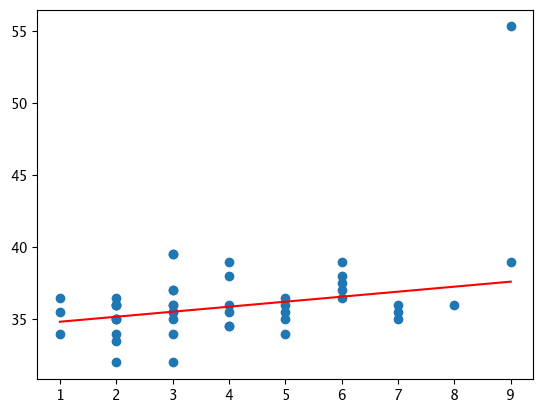

In [28]:
x = df['age']
y= df['tailL']

R2 = simpleRegFit(x, y, simpleRegLossL1)
print(R2)

The R2 value of the fit is 0.851751323747078

### Question 1.2 (7pts) 
Now use your new function, but this time change the Loss function back to the residual sum of squares (RSS) Loss function from week 7. 
You should now replicate exactly the results you got for HW7, task 3, question 5. 

*Written answer: Compare the two fits you obtain with the absolute error and squared error loss function. How do they compare? Compare the $R^2$ values for both fits. Which one is lower? Why?*

0.2228658794760412


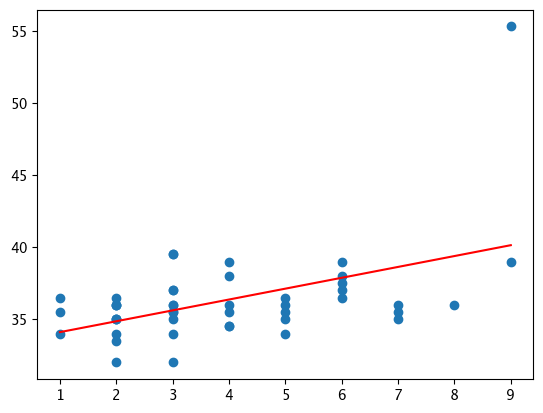

In [15]:
R2 = simpleRegFit(x, y, simpleRegLossRSS)
print(R2)

The R2 value for for RSS is 0.22 while the R2 value for L1 is 0.85. The R2 for RSS is lower. This is because the RSS value is much higher than the L1 value.

## Task 2: Nonlinear (polynomial) regression ( / 40 pts)
For this task, we will use a new data set (fertilizer.csv), which comes from an agricultural study. Each plot of the field (a 10m-by-10m square) was given a randomly determined concentration of fertilizer (in ml/week/m2). The harvest yield for grain in kg/patch was recorded. 
The data has two fields 
- fertCon: Concentration of fertilizer
- harvest: Yield of the harvest in kg


### Question 2.1 ( / 5 pts)
Load the data set and make a scatter plot of fertilizer concentration on the x-axis and harvest yield on the y-axis. How would you describe the relationship? 

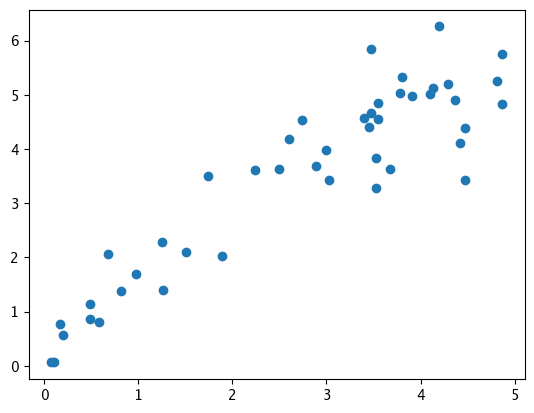

In [29]:
df = pd.read_csv('fertilizer.csv')

plt.scatter(x = df['fertCon'], y = df['harvest'])

This looks like a positively correlated, quadratic with a degree of 2 relationship

### Question 2.2 ( / 12 pts)
Write a function called polyRegPredict(b,x) which returns the prediction of a polynomial regression model on x. The length of b should indicate the order of the model. If b has length 1, the model should be of order 0 (constant). If b has length 2, it should be a linear regression model, if b has length 3, it should be quadratic model (order 2). 

Call your function with x=np.linspace(-5,5,10) and b=[-10,-4,1]. Plot the result as a scatter plot.

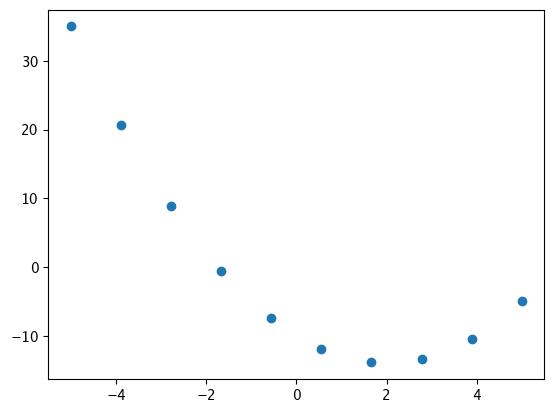

In [77]:
def polyRegPredict(b, x):
    yp = np.zeros(x.shape)
    for i in range(len(b)):
        yp += b[i] * (x ** i)

    return yp

x = np.linspace(-5,5,10)
b = [-10,-4,1]

plt.scatter(x, polyRegPredict(b, x))

### Question 2.3 ( / 18 pts)
Modify you function simpleRegLossRSS from HW7 to become function polyRegLossRSS, which calculates the residual sum of squares and the **derivatives** for the polynomial regression. Also change your function plotPrediction to use polyRegPredict. Then modify your simpleRegFit function to become polyRegFit(x,y,order), which takes the order of the polynomial fit as a third input argument. Call the function for a quadratic fit the harvest yield (y) as a function of fertilizer concentration (x).

Report the $R^2$ for the fit. 

In [79]:
def polyRegLossRSS(b, x, y, fcn=polyRegPredict):
    deriv = np.zeros(len(b))

    yp = fcn(b, x)
    residual = (y - yp)
    RSS = np.sum(residual ** 2)
    for i in range(len(b)):
        deriv[i] = -2 * np.sum(residual * (x ** i))

    return RSS, deriv

def plotPrediction(b, x, y, fcn=polyRegPredict):
    plt.scatter(x, y)
    xp = np.linspace(min(x), max(x), num=50)
    yp = fcn(b, xp)
    return plt.plot(xp, yp, 'r')


def polyRegFit(x, y, order):
    fcn = polyRegLossRSS
    b0 = np.zeros(order+1)

    # (a)
    RESULT = so.minimize(fcn, b0, args = (x, y), jac = True)
    b = RESULT.x

    # (b)
    plotPrediction(b, x, y)

    # (c)
    RSS = fcn(b, x, y)[0]
    TSS = sum((y - np.mean(y))**2)
    R2 = 1 - (RSS/TSS)
    return R2

0.8749779836182522


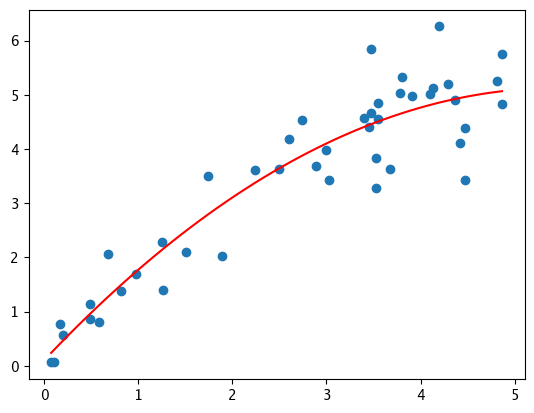

In [84]:
x = df['fertCon']
y = df['harvest']
R2 = polyRegFit(x, y, 2)
print(R2)


The R2 value of the fit is 0.87

### Question 2.4 ( / 5 pts)
Call you polyRegression function to produce a polynomial fit of order 8. 

What is the $R^2$? 

0.9005923245191543


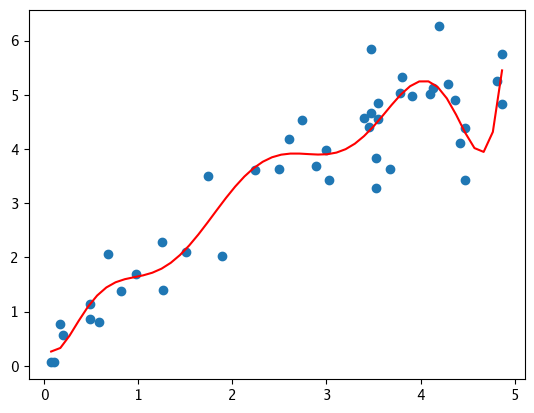

In [93]:
R2 = polyRegFit(x, y, 8)
print(R2)

The R2 value is 0.90 which is higher than the other fit.

## Task 3: Cross-validation of models ( / 40 pts)
### Question 3.1 ( / 20 pts)
Write a function leaveOneOutCV, which takes as inputs x and y, a function to be called for the fit, optional input arguments for the fit, and a function to be called for prediction. The function should then perform leave-on-out crossvalidation and calculate the cross-validated R2. It should then fit the model to all data and calculate the fitted R2. 

*Hint:The sketch of the function can be found in the lecture.*

Call the function to get a cross-validated $R^2$ for a polynomial fit of order 8. How much lower is the crossvalidated $R^2$ than the fitted $R^2$? 

In [ ]:
ind = np.arange(len(df.index))
folds = np.array_split(ind, 10)

def leaveOneOutCV(x, y, fitFcn=polyRegFit, optIn=1, predFcn=polyRegPredict):
    yp_cv = np.zeros(len(x))

    for f in range(len(folds)):
        test_ind = folds[f]
        train_ind = np.concatenate([fold for i, fold in enumerate(folds) if i != f], axis = 0)
        

        # Get test and train data
        df_test = df.loc[test_ind]
        df_train = df.loc[train_ind]

        # Extract features and target variables
        xtrain = df_train['Healthy life expectancy'].values
        ytrain = df_train['Score'].values
        xtest = df_test['Healthy life expectancy'].values

        _, b, _ = polyRegFit(xtrain, ytrain, order=order, fig=False) # False means initializetion does not happen

        # predict on the test set
        yp_cv[test_ind] = polyRegPredict(b, xtest)

        return yp_cv

def cross_validate(df, folds, polyRegFit, o=polyRegPredict, order=3):

    
    
    yp_cv = cross_validate(df, folds, polyRegFit, polyRegPredict, order=3)
    yp_cv # should output an array


### Question 3.2 ( / 20 pts)
Run a loop from model order 0 (constant) to model order 8. For each polynomial model order, call you function leaveOneOutCV to get the crossvalidated R2 and the normal R2 for each model order. Make a plot where you show the line for the crossvalidated R2 and R2 as a function of model order. When is the best crossvalidated R2 reached? When does the model start overfitting? Which model would you use to make a prediction for an unobserved data point? 